# Librarys

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


np.random.seed(13)


# Data for example

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

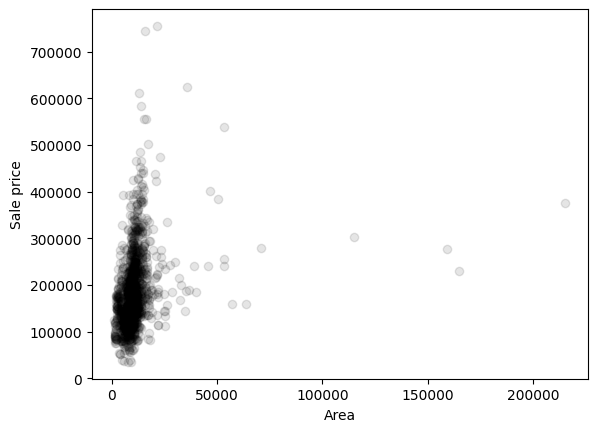

In [4]:
x_train = df["LotArea"]
y_train = df["SalePrice"]

plt.scatter(x_train, y_train, color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()

# Linear Regression

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [5]:
def calculate_model_output(w, b, x):
    """
    Computes the prediction of a linear model
    
    Args:
        x (ndarray (m,)): Data, m examples
        w, b (scalar)   : model parameters
    
    Returns
        f_wb (ndarray (m,)): model prediction
    """
    
    f_wb = np.zeros(x.shape)
    for i in range (len(x)):
        f_wb[i] = w * x[i] + b

    return f_wb

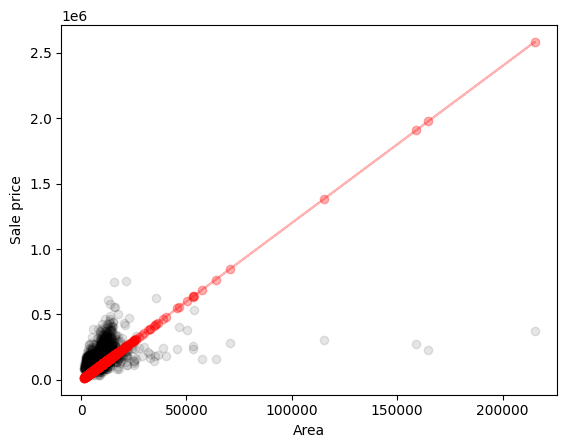

In [6]:
outputs = calculate_model_output(12, -220, x_train)

plt.scatter(x_train, y_train, color="black", alpha=0.1)
plt.plot(x_train, outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()


# Cost function

The cost function, also known as the loss function or objective function, serves as a measure of how well a model is performing by quantifying the difference between the predicted output of the model and the actual target values.

In supervised learning tasks, the goal is typically to minimize this cost function. This minimization process is what drives the training of machine learning models. Different algorithms and tasks may require different cost functions. This is the one that we will be using:

Mean Squared Error (MSE):

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 

where 
- $f_{w,b}(x^{(i)})$ is the prediction for $x_i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [18]:
def cost_function(w, b, x, y):
    """
    Computes the cost for linear regression

    Args:
        w (scalar):             parameter of the model
        b (scalar):             parameter of the model
        x (ndarray): Shape (m,) variable
        y (ndarray): Shape (m,) target

    Returns:
        cost (float): The cost of using (w, b) as the parameters for linear regression
            to fit the data points in x and y
    """
    
    
    predict = calculate_model_output(w, b, x)
    m = len(x)
    cost_i = 0
    for i in range (len(x)):
        cost_i += (y[i] - predict[i])**2

    return (1/(2*m)) * cost_i

In [8]:
cost_function(12, -220, df["LotArea"], df["SalePrice"])

9321875810.033562

## Visualization

The goal is to find a model which will accurately predict $y$ given an input $x$. The cost is a measure of how accurate the model is on the training data. In this visualization one variable changes (w), another remains constant (b).

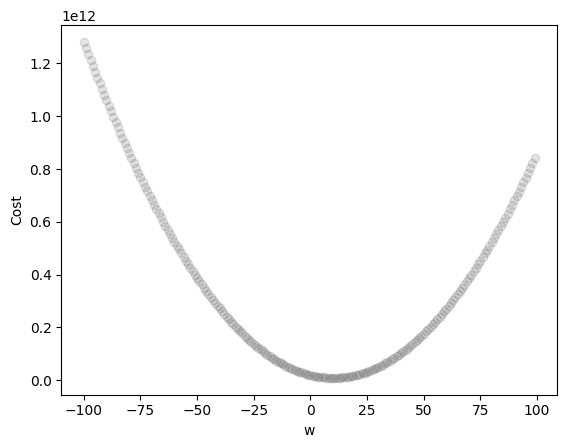

In [9]:
for i in range(-100, 100):
    cost = cost_function(i, 200, x_train, y_train)
    plt.scatter(i, cost, color="black", alpha=0.1)


plt.ylabel('Cost')
plt.xlabel('w')
plt.show()

Both variables change

In [10]:
w_i = []
b_i = []
costs = []

for i in range(-25, 50):
    for j in range(-25, 50):
        w_i.append(i)
        b_i.append(j)
        cost = cost_function(i, j, x_train, y_train)
        costs.append(cost)

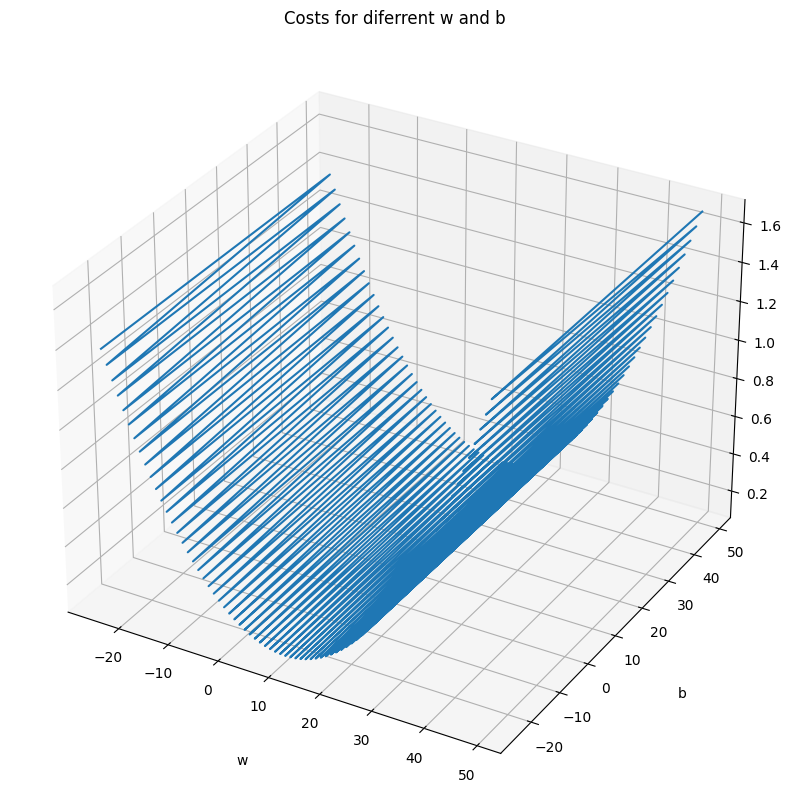

In [11]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot3D(w_i, b_i, costs)

ax.set_xlabel('w', labelpad=20)
ax.set_ylabel('b', labelpad=20)
ax.set_zlabel('cost', labelpad=20)

ax.set_title('Costs for diferrent w and b')
plt.show()

# Gradient Descent

*Dradient descent* can be described as:

$$
\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial b} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}
$$

The parameters $w$ and $b$ are updated simultaneously.  

The gradient are the partial derivatives of the cost function $J(w, b)$ with respect to $w$ and $b$ separetly, defined as:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

The derivatives are used in gradient descent algorithms to update the parameters iteratively.

This is the math to calculate the partial derivatives of the cost function. In this demonstration, it is utilized the product rule:
$
\frac{d}{dx}(u \cdot v) = u\frac{dv}{dx} + v\frac{du}{dx}
$

Demonstration:

$$
\begin{align*}
\frac{\partial J(w, b)}{\partial w} &= \frac{\partial \frac{1}{2m} \sum\limits_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2}{\partial w} \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} \frac{\partial (w \cdot x^{(i)} + b - y^{(i)})^2}{\partial w} \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} (w \cdot x^{(i)} + b - y) \cdot \frac{\partial (w \cdot x^{(i)} + b - y)}{\partial w} + \frac{\partial (w \cdot x^{(i)} + b - y)}{\partial w} \cdot (w \cdot x^{(i)} + b - y) \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} (w \cdot x^{(i)} + b - y) \cdot 2 \cdot  x^{(i)} \\
&= \frac{1}{m} \sum\limits_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) \cdot x^{(i)}
\end{align*}
$$

$$
\begin{align*}
\frac{\partial J(w, b)}{\partial b} &= \frac{\partial \frac{1}{2m} \sum\limits_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2}{\partial b} \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} \frac{\partial (w \cdot x^{(i)} + b - y^{(i)})^2}{\partial b} \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} (w \cdot x^{(i)} + b - y) \cdot \frac{\partial (w \cdot x^{(i)} + b - y)}{\partial b} + \frac{\partial (w \cdot x^{(i)} + b - y)}{\partial b} \cdot (w \cdot x^{(i)} + b - y) \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} (w \cdot x^{(i)} + b - y) \cdot 2 \\
&= \frac{1}{m} \sum\limits_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})
\end{align*}
$$

## Implement Gradient Descent

Gradient descent algorithm will be implemented for one feature.

Conventions:
- The naming of python variables containing partial derivatives follows this pattern, $\frac{\partial J(w, b)}{\partial w}$  will be `dJ_dw`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

In [12]:
def compute_gradient(x, y, w, b):
    """
    Auxiliar function to compute the gradient for linear regression

    Args:
        x (array_like): Input features.
        y (array_like): Target values.
        w (float): Weight parameter.
        b (float): Bias parameter.

    Returns:
        tuple: Tuple containing the partial derivatives of the cost function with respect to w and b.
    """
    
    m = len(x)
    dJ_dw = 0
    dJ_db = 0

    # Calculate the sum from the formula
    for i in range(m):
        f_wb_i = w * x[i] + b
        
        # Sum of partial derivatives of cost for this example
        dJ_dw += (f_wb_i - y[i]) * x[i]
        dJ_db += (f_wb_i - y[i])

    dJ_dw = (1/m) * dJ_dw
    dJ_db = (1/m) * dJ_db
    
    return dJ_dw, dJ_db


def gradient_descent(x, y, lr=0.0000001, thold=1e-6, iterations=100):
    """
    Performs gradient descent optimization to find the optimal parameters for linear regression.

    Args:
        x (array_like): Input features.
        y (array_like): Target values.
        lr (float, optional): Learning rate for gradient descent. Defaults to 0.0000001.
        thold (float, optional): Threshold for convergence. Defaults to 1e-6.
        iterations (int, optional): Maximum number of iterations. Defaults to 100.

    Returns:
        tuple: Tuple containing the optimal weight, bias, lists of weight and bias values during optimization, and list of costs during optimization.
    """
    
    w = np.random.rand()
    b = np.random.rand()
    w_history = []
    b_history = []
    costs_history = []  # current cost = costs_history[-1] / last cost = costs_history[-2]
    
    for i in range(iterations):
        dJ_dw, dJ_db = compute_gradient(x, y, w, b)
        # Updating parameters
        w = w - lr * dJ_dw
        b = b - lr * dJ_db
        
        costs_history.append(cost_function(w, b, x, y))
        w_history.append(w)
        b_history.append(b)
        
        # Printing the parameters for every 100th iteration
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {costs_history[-1]}, Weight {w}, Bias {b}")
        
        
        if len(costs_history) >= 2 and abs(costs_history[-2] - costs_history[-1]) <= thold:
            break
    
    return w, b, w_history, b_history, costs_history    


def plot_gradient_descent(w_history, b_history, costs_history):
    """
    Plots the optimization process of gradient descent.

    Args:
        w_history (array_like): List of weight values during optimization.
        b_history (array_like): List of bias values during optimization.
        costs_history (array_like): List of cost values during optimization.
    """
    
    # Plot
    plt.figure(figsize=(10,10))
    plt.plot(w_history, costs_history)
    plt.scatter(w_history, costs_history, marker='o', color='red')
    plt.xlabel('w', labelpad=20)
    plt.ylabel('cost', labelpad=20)
    plt.title('costs_history for different w')
    plt.show()
    
    iterations_array = np.arange(1, len(costs_history) + 1)
    # Plot
    plt.figure(figsize=(10,10))
    plt.plot(iterations_array, costs_history)
    plt.scatter(iterations_array, costs_history, marker='o', color='red')
    plt.xlabel('iterations', labelpad=20)
    plt.ylabel('cost', labelpad=20)
    plt.title('costs_history by iterations')
    plt.show()
    
    
    # Plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(w_history, b_history, costs_history)
    ax.scatter(w_history, b_history, costs_history, color='red')  # Adicione scatter em 3D
    ax.plot
    ax.set_xlabel('w', labelpad=20)
    ax.set_ylabel('b', labelpad=20)
    ax.set_zlabel('cost', labelpad=20)
    ax.set_title('Costs for different w and b')
    plt.show()

Iteration 0: Cost 14543668896.354208, Weight 2.7260420176339757, Bias 0.23771396203071038
Iteration 100: Cost 8909574515.920109, Weight 10.048398354998925, Bias 0.2456047529685504
Iteration 200: Cost 8909573949.759106, Weight 10.048397978881882, Bias 0.2531291200201702
Iteration 300: Cost 8909573383.598192, Weight 10.048397602349416, Bias 0.26065348671532507
Iteration 400: Cost 8909572817.437283, Weight 10.048397225816974, Bias 0.268177853054036
Iteration 500: Cost 8909572251.276442, Weight 10.048396849284547, Bias 0.27570221903630304
Iteration 600: Cost 8909571685.115665, Weight 10.048396472752138, Bias 0.2832265846621262
Iteration 700: Cost 8909571118.954948, Weight 10.048396096219747, Bias 0.29075094993150546
Iteration 800: Cost 8909570552.794262, Weight 10.048395719687374, Bias 0.2982753148444408
Iteration 900: Cost 8909569986.633635, Weight 10.048395343155017, Bias 0.30579967940093233
Iteration 1000: Cost 8909569420.47308, Weight 10.048394966622679, Bias 0.31332404360098004
Iterat

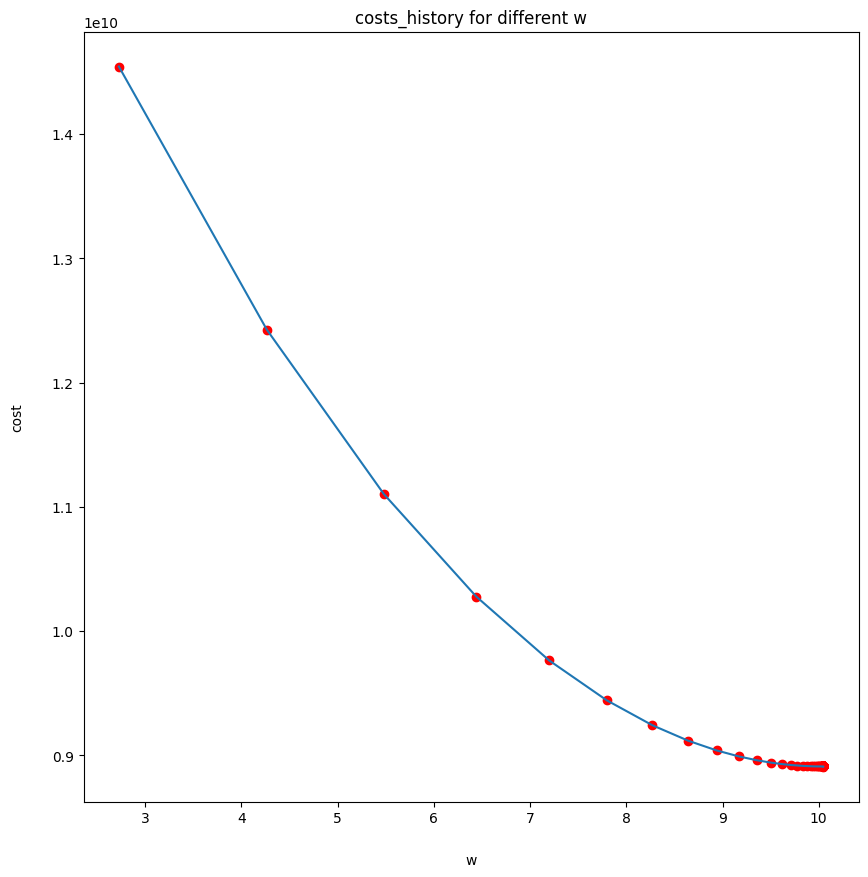

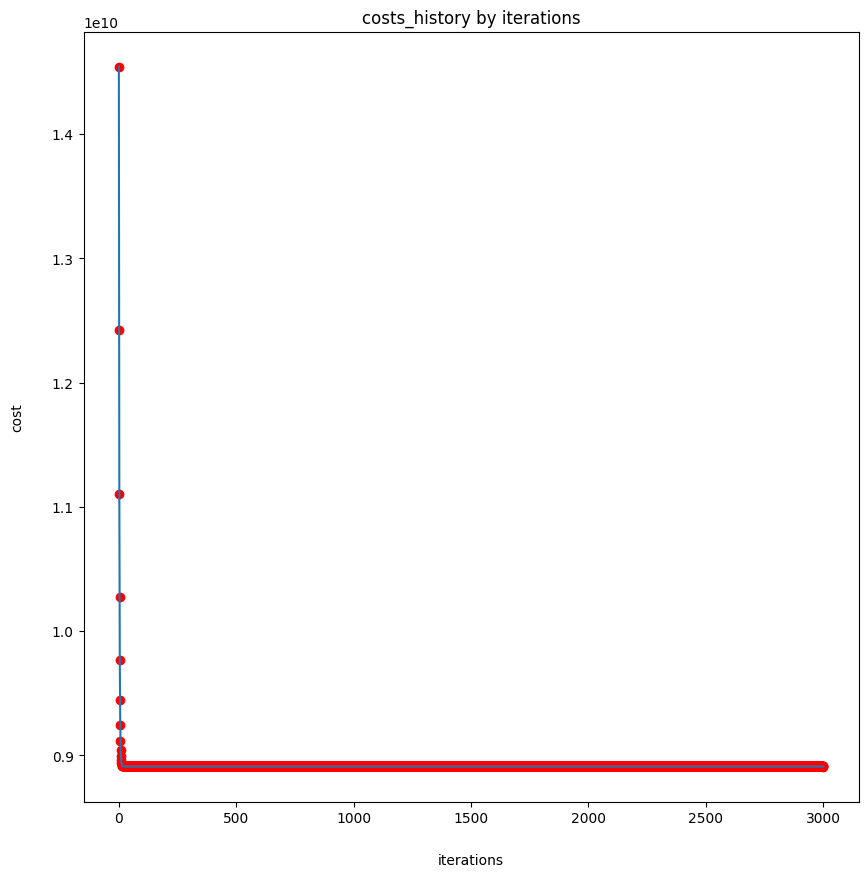

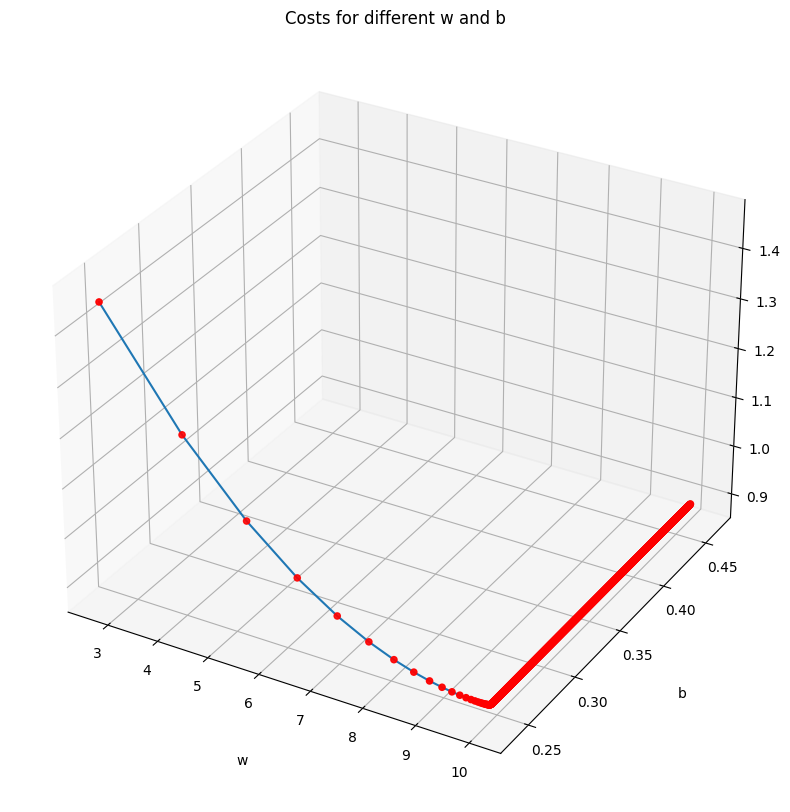

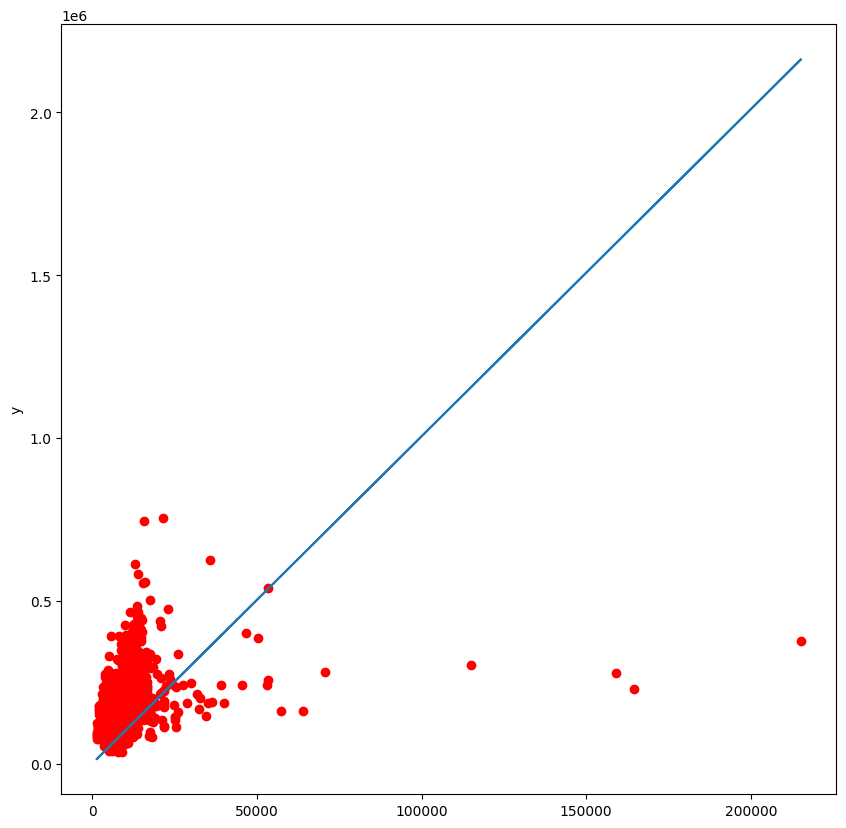

In [13]:
# Test our algorithm
w, b, w_history, b_history, costs_history = gradient_descent(x = x_train, y = y_train, lr = 0.000000001, iterations=3000)

plot_gradient_descent(w_history, b_history, costs_history)


y_calculated = calculate_model_output(w, b, x_train)


fig = plt.figure(figsize=(10,10))

plt.plot(x_train, y_calculated)
plt.scatter(x_train, y_train, color='red')
plt.ylabel('y')

plt.show()

Our algorithm works for fitting a relationship between 2 variables.

# Vectorization

Andrew Ng in his ML Course recommends using vectorization to accelerate calculation on code. So we will be implementing this 

In [14]:
def calculate_model_output(w, b, x):
    f_wb = np.dot(x, w) + b  # Vectorized
    return f_wb


def cost_function(w, b, x, y):
    predict = calculate_model_output(w, b, x)
    m = len(x)
    cost = np.sum((y - predict)**2)  / (2*m) # Vectorized
    
    return  cost


def compute_gradient(x, y, w, b):
    m = len(x)
    f_wb = calculate_model_output(w, b, x)
    j_wb_der_w = np.sum((f_wb - y) * x)
    j_wb_der_b = np.sum(f_wb - y)

    j_wb_der_w *= (1 / m)
    j_wb_der_b *= (1 / m)
    
    return j_wb_der_w, j_wb_der_b

# Multiple Linear Regression

In [46]:
def calculate_model_output_multiple(w, b, x):
    """
    Computes the model output for multiple linear regression

    Args:
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features

    Returns:
        f_wb (ndarray): Shape (m,) model output for each sample
    """
    f_wb = np.dot(x, w) + b
    return f_wb


def compute_gradient_multiple(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features
        y (ndarray): Shape (m,) target
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model

    Returns:
        dJ_dw (ndarray): Partial derivative of cost with respect to w, shape (n,)
        dJ_db (scalar): Partial derivative of cost with respect to b
    """
    
    m = len(x)
    f_wb = calculate_model_output_multiple(w, b, x)
    dJ_dw = np.dot((f_wb - y), x)
    dJ_db = np.sum(f_wb - y)
    
    dJ_dw = np.multiply(dJ_dw, 1/m)
    dJ_db *= (1 / m)
    
    
    return dJ_dw, dJ_db


def multiple_linear_regression(x, y, lr=0.00000001, thold=1e-2, iterations=1000):
    w = [np.random.rand() for _ in x.columns]
    b = np.random.rand()
    
    w_history = []
    b_history = []
    costs_history = []  # current cost = costs_history[-1] / last cost = costs_history[-2]
    
    for i in range(int(iterations)):
        dJ_dw, dJ_db = compute_gradient_multiple(x, y, w, b)
        # Updating parameters
        w = w - lr * dJ_dw
        b = b - lr * dJ_db
        
        costs_history.append(cost_function(w, b, x, y))
        w_history.append(w)
        b_history.append(b)

        # Printing the parameters for every 100th iteration
        if i % 5000 == 0:
            print(f"Iteration {i}: Cost {costs_history[-1]}, Weight {w}, Bias {b}")
            
            
        if len(costs_history) >= 2 and abs(costs_history[-2] - costs_history[-1]) <= thold:
            break
    
    print(f"Model converged using  after {i} iterations with: \nCost: {costs_history[-1]} \nWeight: {w} \nBias: {b}")
    
    return w, b, w_history, b_history, costs_history

In [49]:
x_train = df[["LotArea", "OverallQual", "YearBuilt"]]
w, b, w_history, b_history, costs_history = multiple_linear_regression(x_train, y_train, lr=1e-9, thold = 1, iterations=1e5)

Iteration 0: Cost 18223079337.536106, Weight [0.63180817 0.87381459 0.00906052], Bias 0.7465774112680729
Iteration 5000: Cost 9794026242.16255, Weight [6.7017254  0.87834447 1.3488675 ], Bias 0.7472539461954256
Iteration 10000: Cost 8692360730.165731, Weight [8.75532574 0.88158989 2.28225751], Bias 0.7477243536995811
Iteration 15000: Cost 8469709243.21788, Weight [9.41959456 0.88437794 3.07075349], Bias 0.7481212736660492
Iteration 20000: Cost 8353945756.053897, Weight [9.60353697 0.88699494 3.80488824], Bias 0.7484906227480667
Iteration 25000: Cost 8252590162.553452, Weight [9.62168987 0.8895401  4.51602689], Bias 0.7488483088042005
Iteration 30000: Cost 8154540280.83677, Weight [9.58288787 0.89204783 5.21506063], Bias 0.7491998556507466
Iteration 35000: Cost 8058438238.303634, Weight [9.52478698 0.89453018 5.90579574], Bias 0.7495471937658489
Iteration 40000: Cost 7964093412.821602, Weight [9.46041351 0.89699141 6.5895866 ], Bias 0.7498910100609019
Iteration 45000: Cost 7871455449.45

In [50]:
w1_history = [w[0] for w in w_history]
w2_history = [w[1] for w in w_history]
w3_history = [w[2] for w in w_history]

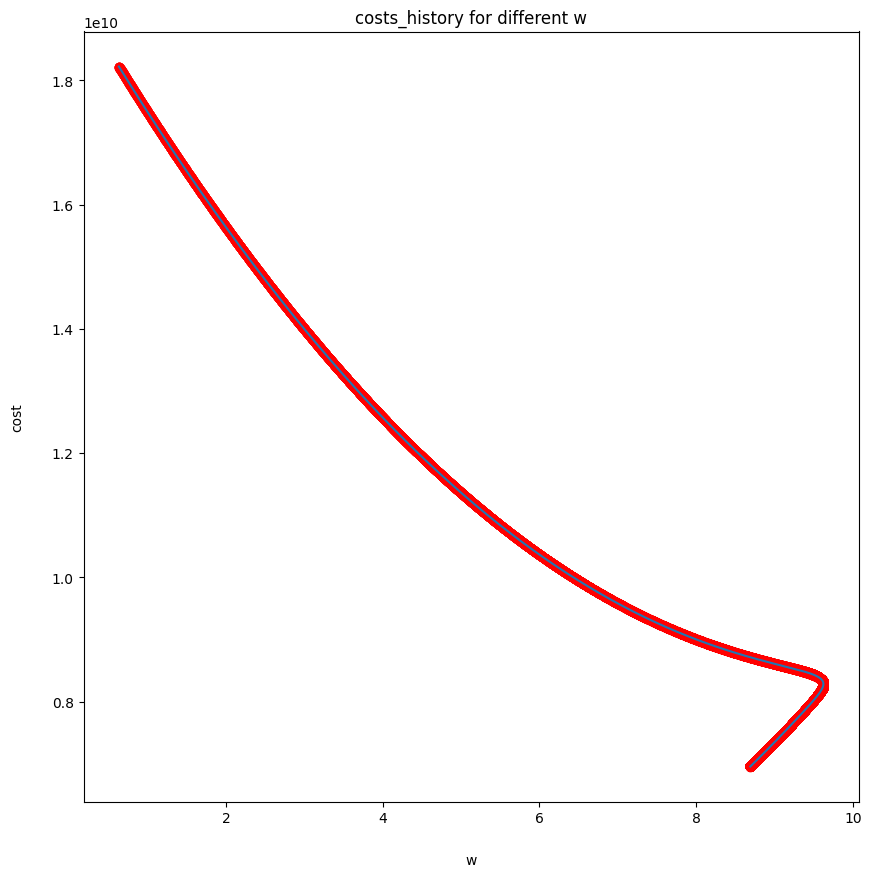

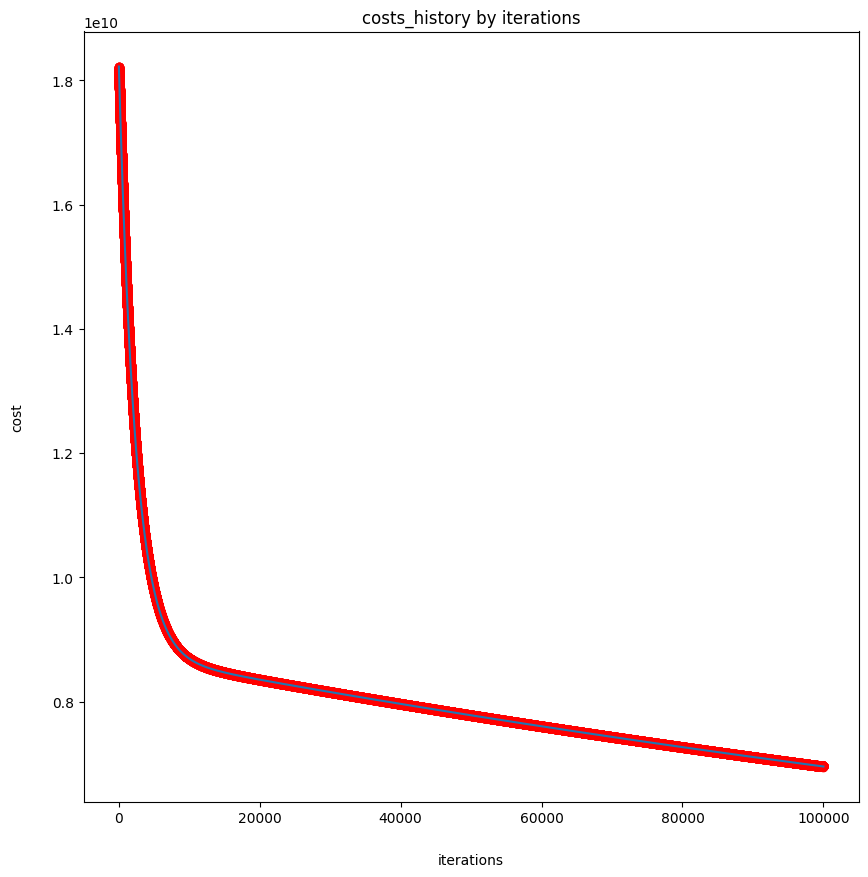

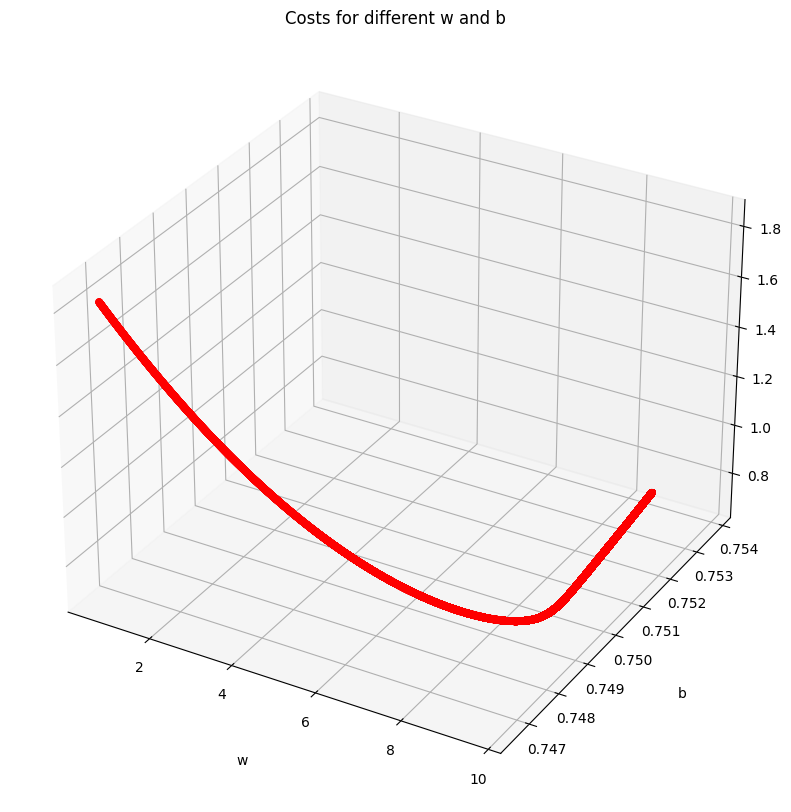

In [51]:
plot_gradient_descent(w1_history, b_history, costs_history)

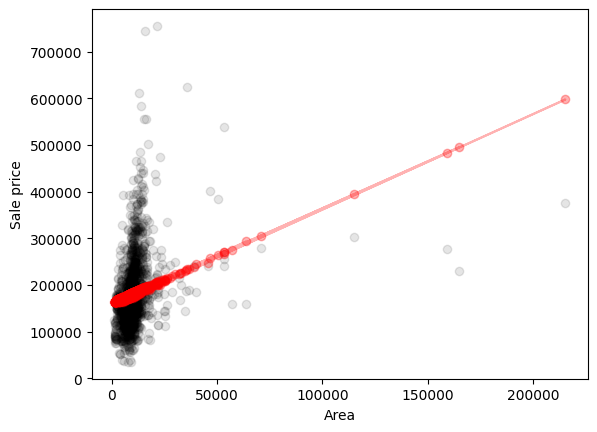

In [39]:
outputs = calculate_model_output(w, b, x_train)

plt.scatter(x_train["LotArea"], y_train, color="black", alpha=0.1)
plt.plot(x_train["LotArea"], outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()


# Feature Scaling

Feature scaling is crucial in machine learning for several reasons. Features often have different scales. For instance, one feature might range from 1 to 100 while another from 1 to 100,000. When training machine learning models, features with larger scales can dominate those with smaller scales, leading to biased model fitting. Feature scaling brings all features to a similar scale, preventing this dominance issue.

Also, since many machine learning algorithms use distance-based calculations, such as gradient descent in linear regression or K-nearest neighbors. Feature scaling ensures that these algorithms converge faster and perform better by making the optimization process smoother and preventing certain features from having undue influence.

Scaling features to a similar range will also make the coefficients of a model more interpretable. Without scaling, it's difficult to compare the importance of different features based solely on their coefficient magnitudes.

We can also mention that in some in some algorithms, especially those that involve matrix computations or gradients, having features on vastly different scales can lead to numerical instability. This instability can manifest as overflow or underflow issues, causing algorithms to fail or produce unreliable results.

In [52]:
def scaling(x):
    x_scaled = x/max(x)
    
    return x_scaled


def mean_normalization(x):
    x_normalized = (x - np.mean(x)) / (max(x) - min(x))
    
    return x_normalized


def variance(x):
    mean = np.mean(x)
    var = np.sum((x - mean)**2) / len(x)
    
    return var


def standard_deviation(x):
    std = np.sqrt(variance(x))
    
    return std


def z_score_normalization(x):
    mean = np.mean(x)
    x_normalized = (x - mean) / standard_deviation(x)
    
    return x_normalized


def normalize_df(df):
    df_norm = pd.DataFrame()
    for x in df:
        df_norm[x] = mean_normalization(df[x])
    
    return df_norm

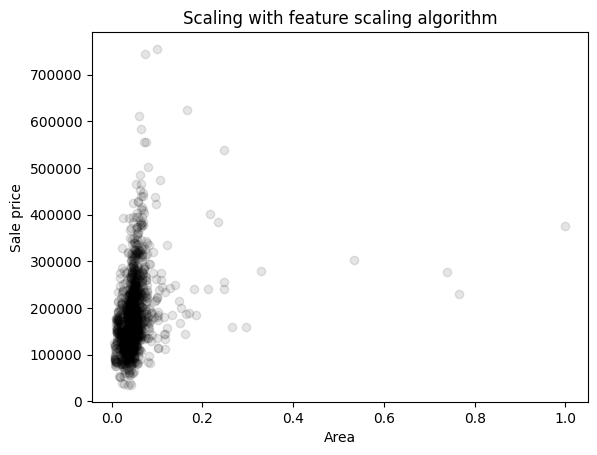

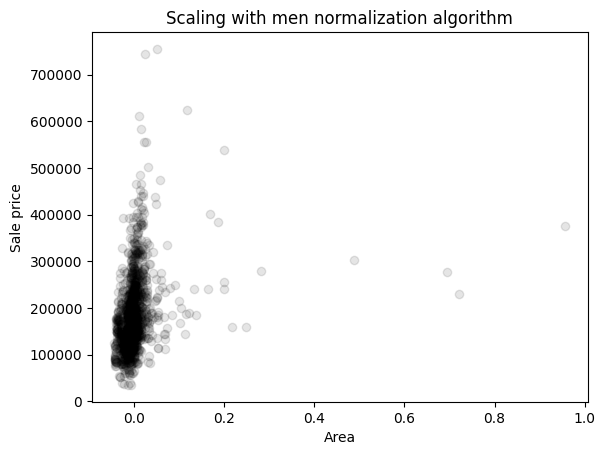

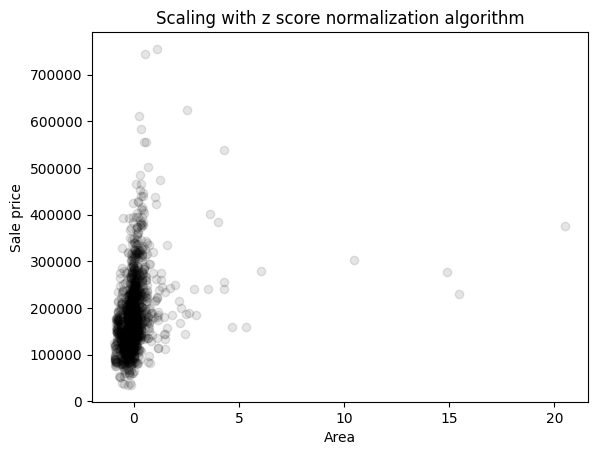

In [53]:
plt.scatter(scaling(df["LotArea"]), df["SalePrice"], color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.title("Scaling with feature scaling algorithm")
plt.show()

plt.scatter(mean_normalization(df["LotArea"]), df["SalePrice"], color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.title("Scaling with men normalization algorithm")
plt.show()

plt.scatter(z_score_normalization(df["LotArea"]), df["SalePrice"], color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.title("Scaling with z score normalization algorithm")
plt.show()

Let's try to run the gradient descent now that we can have better features

In [ ]:
X_normalized = normalize_df(x_train)

w, b, w_history, b_history, costs_history = multiple_linear_regression(X_normalized, Y, lr=1e-2, iterations=1e5)

Iteration 10000: Cost 1158349386.914881, Weight [ 73022.95295036 301436.53478614  78824.67626353], Bias 180921.1958904095
Iteration 20000: Cost 1092315548.4430752, Weight [123000.90712898 353780.11034208  50157.33045801], Bias 180921.1958904095
Iteration 30000: Cost 1074810438.9585161, Weight [161529.98347859 366632.42209938  42684.07683356], Bias 180921.1958904095
Iteration 40000: Cost 1065285157.737431, Weight [192145.97858498 369076.98605218  41029.26220951], Bias 180921.1958904095
Iteration 50000: Cost 1059213977.4313446, Weight [216733.21152147 368893.87571442  40884.28160539], Bias 180921.1958904095
Iteration 60000: Cost 1055265674.4677137, Weight [236550.43982127 368159.47602915  41091.13583693], Bias 180921.1958904095
Iteration 70000: Cost 1052692002.1947037, Weight [252542.63643688 367406.96766382  41346.24828742], Bias 180921.1958904095
Iteration 80000: Cost 1051013931.6469171, Weight [265453.42461166 366755.95872536  41576.19883992], Bias 180921.1958904095
Iteration 90000: C

The cost got mutch lower with this statistical trick. From almost 3x10^9 to around 1x10^9

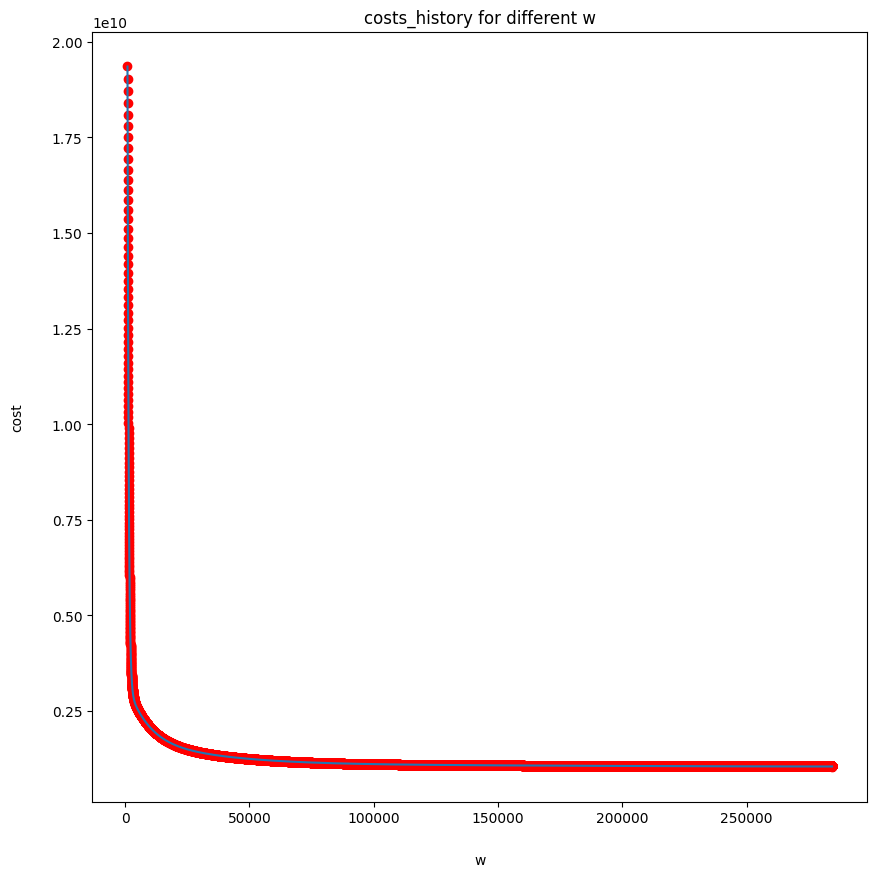

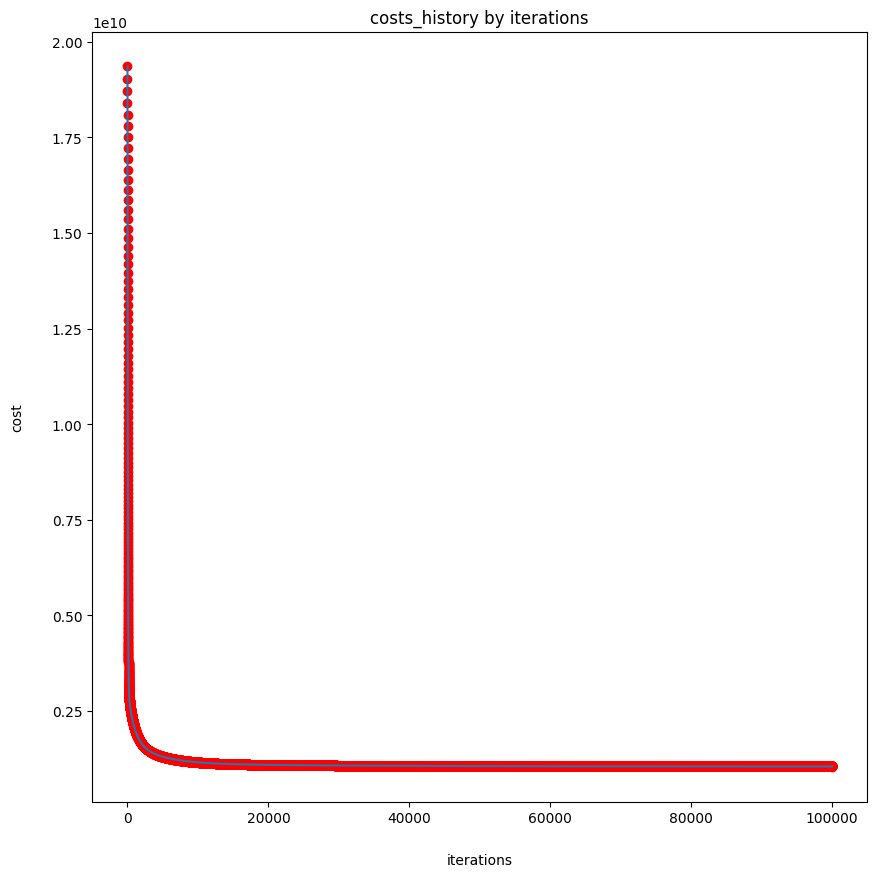

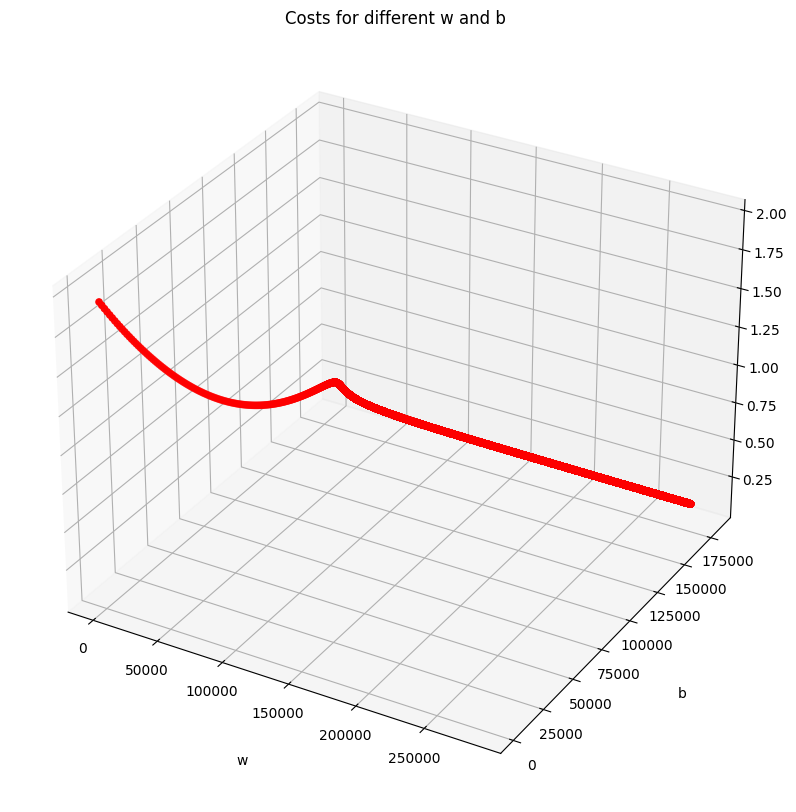

In [ ]:
w1_history = [w[0] for w in w_history]
w2_history = [w[1] for w in w_history]
w3_history = [w[2] for w in w_history]

plot_gradient_descent(w1_history, b_history, costs_history)

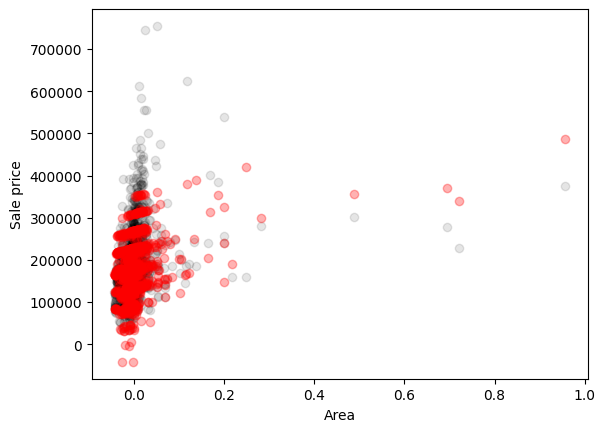

In [ ]:
outputs = calculate_model_output(w, b, X_normalized)

plt.scatter(X_normalized["LotArea"], Y, color="black", alpha=0.1)
plt.scatter(X_normalized["LotArea"], outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()